Linear       R² = 0.9613, params = [1.44982296 0.024281  ]
Logarithmic  R² = 0.8110, params = [0.14694108 0.89298458]
Power law    R² = 0.9873, params = [0.57092083 0.44049964]
Quadratic    R² = 0.9961, params = [ 1.11593745e+00  4.15043644e-02 -8.60132362e-05]


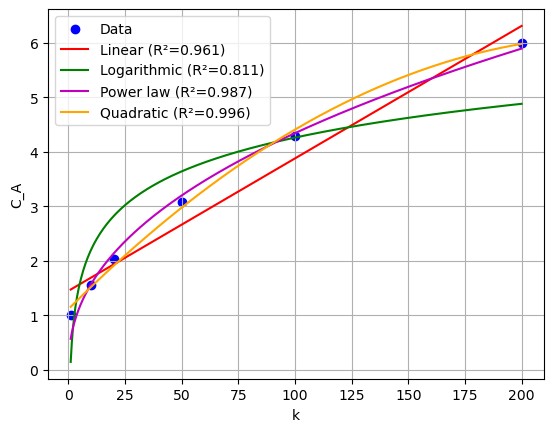

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Data
x = np.array([1, 10, 20, 50, 100, 200])
y = np.array([1.0, 1.55, 2.04, 3.08, 4.28, 6.00])

# Candidate models
def linear(x, a, b):
    return a + b*x

def log_model(x, a, b):
    return a + b*np.log(x)

def power_model(x, a, b):
    return a * np.power(x, b)

def poly2(x, a, b, c):
    return a + b*x + c*x**2

# Fit models
fits = {}
for name, model, p0 in [
    ("Linear", linear, [1, 0.01]),
    ("Logarithmic", log_model, [1, 1]),
    ("Power law", power_model, [1, 0.5]),
    ("Quadratic", poly2, [1, 0.01, 0.0001])
]:
    popt, _ = curve_fit(model, x, y, p0=p0, maxfev=10000)
    y_pred = model(x, *popt)
    r2 = r2_score(y, y_pred)
    fits[name] = (model, popt, r2)

# Print results
for name, (model, params, r2) in fits.items():
    print(f"{name:12s} R² = {r2:.4f}, params = {params}")

# Plot best fits
x_fit = np.linspace(min(x), max(x), 400)
plt.scatter(x, y, color="blue", label="Data")

colors = ["r", "g", "m", "orange"]
for (name, (model, params, r2)), c in zip(fits.items(), colors):
    y_fit = model(x_fit, *params)
    plt.plot(x_fit, y_fit, c, label=f"{name} (R²={r2:.3f})")

plt.xlabel("k")
plt.ylabel("C_A")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Linear fitting to the curve:
# Coefficients from curve_fit: a = 1.44982296, b = 0.024281
k_new = 700
y_est_linear = 1.44982296 + 0.024281 * k_new
print(f"Estimated y (linear fit) at k={k_new}: {y_est_linear:.3f}")

Estimated y (linear fit) at k=700: 18.447


In [7]:
# Suppose a_pow, b_pow came from curve_fit
k_new = [5,15,25,30,35,40,45,55,60,65,70,75,80,85,90,95]
for k in k_new:
    y_est = 0.57092083 * (k ** 0.44049964)
    print(f"Estimated y at k={k}: {y_est:.3f}")


Estimated y at k=5: 1.160
Estimated y at k=15: 1.882
Estimated y at k=25: 2.357
Estimated y at k=30: 2.554
Estimated y at k=35: 2.734
Estimated y at k=40: 2.899
Estimated y at k=45: 3.054
Estimated y at k=55: 3.336
Estimated y at k=60: 3.466
Estimated y at k=65: 3.591
Estimated y at k=70: 3.710
Estimated y at k=75: 3.824
Estimated y at k=80: 3.934
Estimated y at k=85: 4.041
Estimated y at k=90: 4.144
Estimated y at k=95: 4.244


In [8]:
k_new = [105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195]
for k in k_new:
    y_est = 0.57092083 * (k ** 0.44049964)
    print(f"Estimated y at k={k}: {y_est:.3f}")

Estimated y at k=105: 4.435
Estimated y at k=110: 4.527
Estimated y at k=115: 4.616
Estimated y at k=120: 4.704
Estimated y at k=125: 4.789
Estimated y at k=130: 4.873
Estimated y at k=135: 4.954
Estimated y at k=140: 5.034
Estimated y at k=145: 5.113
Estimated y at k=150: 5.190
Estimated y at k=155: 5.265
Estimated y at k=160: 5.339
Estimated y at k=165: 5.412
Estimated y at k=170: 5.484
Estimated y at k=175: 5.554
Estimated y at k=180: 5.624
Estimated y at k=185: 5.692
Estimated y at k=190: 5.759
Estimated y at k=195: 5.826


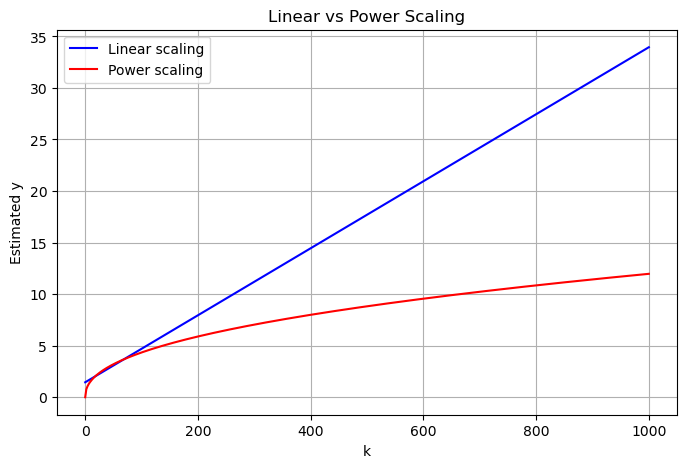

In [18]:
k_range = np.linspace(0, 1000, 500)
y_linear = 1.44982296 + 0.0325 * k_range
y_power = 0.57092083 * (k_range ** 0.44049964)

plt.figure(figsize=(8,5))
plt.plot(k_range, y_linear, label="Linear scaling", color="blue")
plt.plot(k_range, y_power, label="Power scaling", color="red")
plt.xlabel("k")
plt.ylabel("Estimated y")
plt.title("Linear vs Power Scaling")
plt.legend()
plt.grid(True)
plt.show()